# SC1015 Mini Project


### Importing Libraries

This section imports necessary Python libraries that will be used throughout the notebook. This includes libraries for data manipulation, data visualization, machine learning, and metrics evaluation.


In [128]:
#importing and settings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.feature_selection import SelectKBest, f_regression, RFE
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import r2_score
import warnings
import pickle

warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', 200)

### Data Loading

Here, the dataset `train.csv` is loaded into a pandas DataFrame. This dataset includes historical data of flat resale prices along with various features.



In [213]:
#Import the data
data = pd.read_csv('train.csv')

### Data Cleaning

In this section, we standardize column names and remove irrelevant columns that will not contribute to the model training.


In [214]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150634 entries, 0 to 150633
Data columns (total 78 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   id                         150634 non-null  int64  
 1   Tranc_YearMonth            150634 non-null  object 
 2   town                       150634 non-null  object 
 3   flat_type                  150634 non-null  object 
 4   block                      150634 non-null  object 
 5   street_name                150634 non-null  object 
 6   storey_range               150634 non-null  object 
 7   floor_area_sqm             150634 non-null  float64
 8   flat_model                 150634 non-null  object 
 9   lease_commence_date        150634 non-null  int64  
 10  resale_price               150634 non-null  float64
 11  Tranc_Year                 150634 non-null  int64  
 12  Tranc_Month                150634 non-null  int64  
 13  mid_storey                 15

In [215]:
#standardizing all column names to be in snake case
data.columns = data.columns.str.lower().str.replace(' ','_')

In [216]:
# columns you believe are irrelevant
irrelevant_cols = ['id', 'block', 'street_name', 'address', 'postal', 'bus_stop_name', 'mrt_latitude', 'mrt_longitude',
                   'bus_stop_latitude', 'bus_stop_longitude', 'pri_sch_latitude', 'pri_sch_longitude', 'sec_sch_latitude', 'sec_sch_longitude',
                   'floor_area_sqft', 'lease_commence_date', 'tranc_yearmonth', 'mid_storey', 'full_flat_type', 'block']

# Filter out columns that do not exist in the DataFrame
cols_to_drop = [col for col in irrelevant_cols if col in data.columns]

# Drop these columns from the DataFrame
data.drop(columns=cols_to_drop, axis=1, inplace=True)

# Print the remaining columns to verify
print("Remaining columns after dropping:", data.columns)


Remaining columns after dropping: Index(['town', 'flat_type', 'storey_range', 'floor_area_sqm', 'flat_model',
       'resale_price', 'tranc_year', 'tranc_month', 'lower', 'upper', 'mid',
       'price_per_sqft', 'hdb_age', 'max_floor_lvl', 'year_completed',
       'residential', 'commercial', 'market_hawker', 'multistorey_carpark',
       'precinct_pavilion', 'total_dwelling_units', '1room_sold', '2room_sold',
       '3room_sold', '4room_sold', '5room_sold', 'exec_sold', 'multigen_sold',
       'studio_apartment_sold', '1room_rental', '2room_rental', '3room_rental',
       'other_room_rental', 'latitude', 'longitude', 'planning_area',
       'mall_nearest_distance', 'mall_within_500m', 'mall_within_1km',
       'mall_within_2km', 'hawker_nearest_distance', 'hawker_within_500m',
       'hawker_within_1km', 'hawker_within_2km', 'hawker_food_stalls',
       'hawker_market_stalls', 'mrt_nearest_distance', 'mrt_name',
       'bus_interchange', 'mrt_interchange', 'bus_stop_nearest_distance',

In [217]:
#any columns with only 1 unique value will not be helpful in a prediction model 
for x in data.columns:
    print(x, len(data[x].unique()))
    if len(data[x].unique()) == 1:
        data.drop(x, axis=1, inplace=True)
        print(f'{x} column dropped due to having only 1 unique value')
        print()

town 26
flat_type 7
storey_range 25
floor_area_sqm 169
flat_model 20
resale_price 3295
tranc_year 10
tranc_month 12
lower 22
upper 23
mid 22
price_per_sqft 24966
hdb_age 54
max_floor_lvl 41
year_completed 59
residential 1
residential column dropped due to having only 1 unique value

commercial 2
market_hawker 2
multistorey_carpark 2
precinct_pavilion 2
total_dwelling_units 320
1room_sold 2
2room_sold 99
3room_sold 255
4room_sold 200
5room_sold 133
exec_sold 103
multigen_sold 7
studio_apartment_sold 61
1room_rental 11
2room_rental 48
3room_rental 15
other_room_rental 3
latitude 9126
longitude 9098
planning_area 32
mall_nearest_distance 8983
mall_within_500m 7
mall_within_1km 16
mall_within_2km 42
hawker_nearest_distance 9126
hawker_within_500m 6
hawker_within_1km 10
hawker_within_2km 20
hawker_food_stalls 52
hawker_market_stalls 70
mrt_nearest_distance 9126
mrt_name 94
bus_interchange 2
mrt_interchange 2
bus_stop_nearest_distance 9126
pri_sch_nearest_distance 9126
pri_sch_name 177
vacan

In [218]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150634 entries, 0 to 150633
Data columns (total 58 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   town                       150634 non-null  object 
 1   flat_type                  150634 non-null  object 
 2   storey_range               150634 non-null  object 
 3   floor_area_sqm             150634 non-null  float64
 4   flat_model                 150634 non-null  object 
 5   resale_price               150634 non-null  float64
 6   tranc_year                 150634 non-null  int64  
 7   tranc_month                150634 non-null  int64  
 8   lower                      150634 non-null  int64  
 9   upper                      150634 non-null  int64  
 10  mid                        150634 non-null  int64  
 11  price_per_sqft             150634 non-null  float64
 12  hdb_age                    150634 non-null  int64  
 13  max_floor_lvl              15

### Data Preprocessing

This includes handling missing values and ensuring that the data types are correct for each feature. We also perform one-hot encoding for categorical variables here.

In [135]:
#finding columns with null values
data.isnull().sum().sort_values().tail(8)

4room_sold                   0
mall_nearest_distance      829
mall_within_2km           1940
mall_within_1km          25426
hawker_within_2km        29202
hawker_within_1km        60868
mall_within_500m         92789
hawker_within_500m       97390
dtype: int64

In [136]:
data['mall_nearest_distance']

0         1094.090418
1          866.941448
2         1459.579948
3          950.175199
4          729.771895
             ...     
150629     585.138715
150630     250.084466
150631    1790.053482
150632     587.244922
150633     225.435937
Name: mall_nearest_distance, Length: 150634, dtype: float64

In [137]:
data[data['mall_nearest_distance'].isnull()][['mall_nearest_distance', 'mall_within_500m', 'mall_within_1km', 'mall_within_2km']]

mall_nearest_distance  mall_within_500m  mall_within_1km  \
75                        NaN               NaN              NaN   
321                       NaN               NaN              NaN   
478                       NaN               NaN              NaN   
643                       NaN               NaN              NaN   
691                       NaN               NaN              NaN   
...                       ...               ...              ...   
150296                    NaN               NaN              NaN   
150388                    NaN               NaN              NaN   
150394                    NaN               NaN              NaN   
150479                    NaN               NaN              NaN   
150625                    NaN               NaN              NaN   

        mall_within_2km  
75                  NaN  
321                 NaN  
478                 NaN  
643                 NaN  
691                 NaN  
...                 ...  
150296              NaN  
150388              NaN  
150394              NaN  
150479              NaN  
150625              NaN  

[829 rows x 4 columns]

In [138]:
#Exploring Null Rows - looks like null value are 0 (i.e. no malls within stated distance)
data[data['mall_nearest_distance'].isnull()][['mall_within_500m', 'mall_within_1km', 'mall_within_2km']]

mall_within_500m  mall_within_1km  mall_within_2km
75                   NaN              NaN              NaN
321                  NaN              NaN              NaN
478                  NaN              NaN              NaN
643                  NaN              NaN              NaN
691                  NaN              NaN              NaN
...                  ...              ...              ...
150296               NaN              NaN              NaN
150388               NaN              NaN              NaN
150394               NaN              NaN              NaN
150479               NaN              NaN              NaN
150625               NaN              NaN              NaN

[829 rows x 3 columns]

In [139]:
#imputing a value of over 2000m for the null values in 'mall_nearest_distance'
imputer=SimpleImputer(missing_values=np.NaN, strategy='constant', fill_value=2001)
data['mall_nearest_distance'] = imputer.fit_transform(data['mall_nearest_distance'].values.reshape(-1,1))


In [140]:
#filling null values with 0
col_with_null = data.columns[data.isnull().sum() != 0].to_list()
imputer=SimpleImputer(missing_values=np.NaN, strategy='constant', fill_value=0)
for x in col_with_null:
    data[x]=imputer.fit_transform(data[x].values.reshape(-1,1))

# Exploratory Data Analysis (EDA)

This section visualizes different aspects of the dataset to understand relationships between features and the target variable, distribution of important features, and potential correlations.


Text(0.5, 0, 'Resale Price (SGD$ million)')

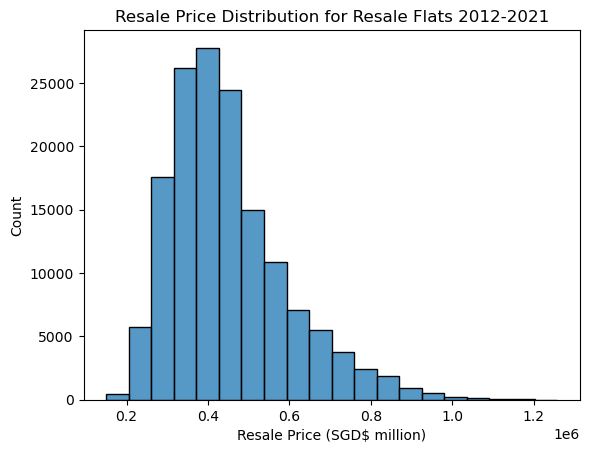

In [141]:
#Plot to look at resale prices distribution 
sns.histplot(data=data, x= 'resale_price', bins=20, stat='count')
plt.title('Resale Price Distribution for Resale Flats 2012-2021')
plt.xlabel('Resale Price (SGD$ million)')

### Resale Price Distribution for Resale Flats (2012-2021)

The histogram illustrates the frequency distribution of resale prices for flats from 2012 to 2021. Most resale prices cluster between SGD 200,000 and SGD 400,000, indicating a high concentration of flats sold in this range. The distribution shows a right-skewed pattern, with fewer flats being sold at higher prices, tapering off past SGD 600,000. This suggests that while there is a significant market for mid-priced flats, high-end flats are less commonly transacted. The absence of long tails on the lower end also implies a minimum threshold around SGD 200,000 below which resale transactions are scarce.


In [142]:
pip install folium


Note: you may need to restart the kernel to use updated packages.


In [143]:
import folium
from folium.plugins import HeatMap

# Assuming 'data' DataFrame contains 'Latitude', 'Longitude', and 'resale_price'

# Create a map centered around the average location
map_center = [data['latitude'].mean(), data['longitude'].mean()]
map = folium.Map(location=map_center, zoom_start=12, tiles='CartoDB positron')

# Add a heat map layer for resale prices
heat_data = [[row['latitude'], row['longitude'], row['resale_price']/1000000] for index, row in data.iterrows()]
HeatMap(heat_data, radius=15, blur=10).add_to(map)

# Display the map
map


#### GEOSPATIAL ANALYSIS
This heatmap provides a visual representation of resale price distribution and can reveal high-priced areas, trends across the geography, 

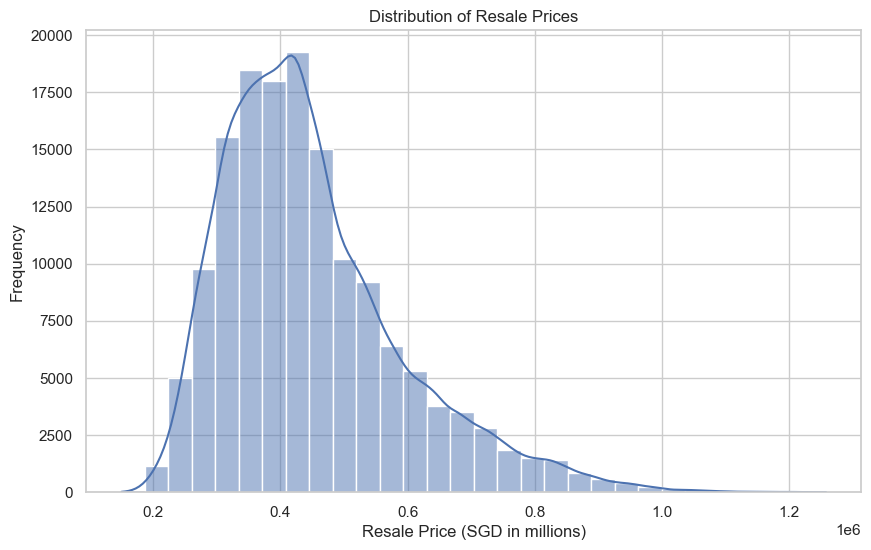

In [166]:
plt.figure(figsize=(10, 6))
sns.histplot(data['resale_price'], bins=30, kde=True)
plt.title('Distribution of Resale Prices')
plt.xlabel('Resale Price (SGD in millions)')
plt.ylabel('Frequency')
plt.show()

### Distribution of Resale Prices

This histogram represents the distribution of resale prices for properties. The data shows a bell-shaped distribution, with the highest frequency of properties sold in the SGD 300,000 to  SGD 400,000 price range.

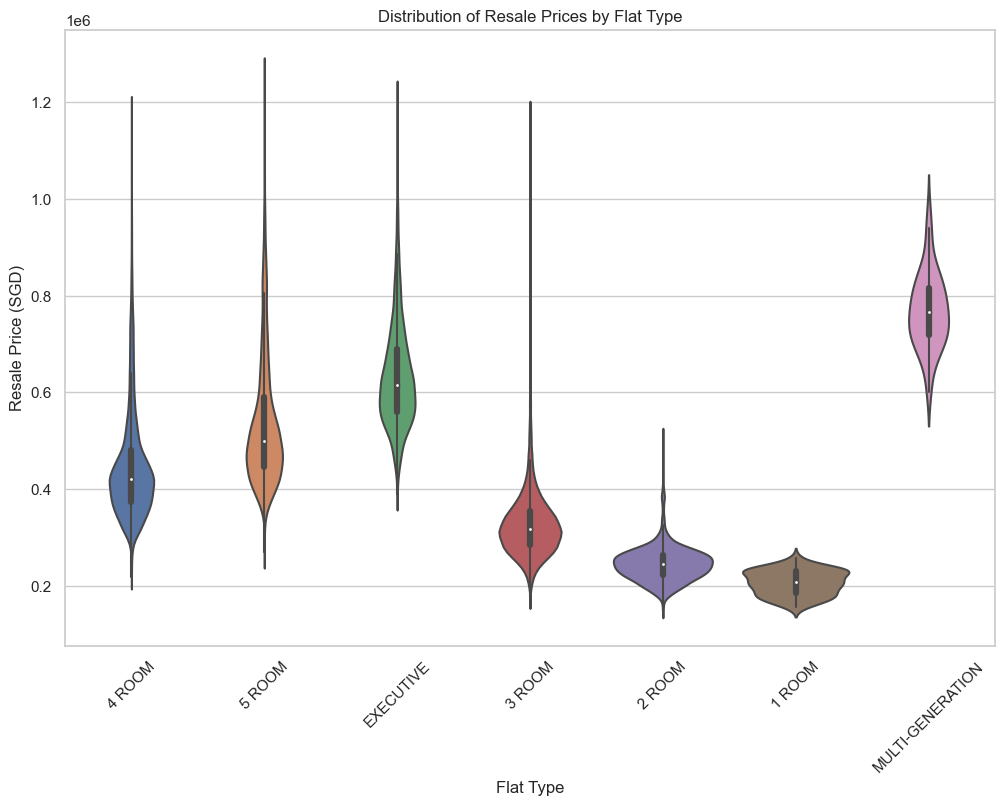

In [165]:
sns.set(style="whitegrid")

plt.figure(figsize=(12, 8))
sns.violinplot(x='flat_type', y='resale_price', data=data)
plt.title('Distribution of Resale Prices by Flat Type')
plt.xlabel('Flat Type')
plt.ylabel('Resale Price (SGD)')
plt.xticks(rotation=45)  # Rotate labels if they overlap

plt.show()

### Distribution of Resale Prices by Flat Type

The violin plot provides insights into the distribution of resale prices segmented by flat types. It reveals that executive flats have a wider spread of prices and generally higher median prices compared to other flat types. One-room flats exhibit the narrowest price distribution, indicating less variability in their resale prices. The Multi-Generation flat type appears as an outlier with a very narrow distribution, suggesting it is less common on the market.


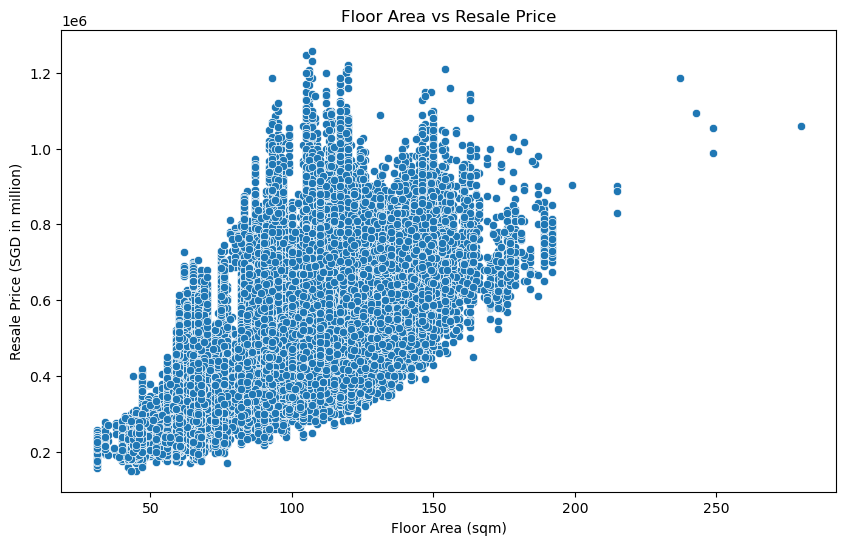

In [146]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='floor_area_sqm', y='resale_price', data=data)
plt.title('Floor Area vs Resale Price')
plt.xlabel('Floor Area (sqm)')
plt.ylabel('Resale Price (SGD in million)')
plt.show()


### Floor Area vs Resale Price

The scatter plot depicts the relationship between the floor area of flats and their resale prices in Singapore dollars (SGD). Each point represents a flat, with the horizontal axis showing the floor area in square meters and the vertical axis showing the resale price in millions. The plot reveals a general trend that larger flats tend to have higher resale prices. There is a wide spread of resale prices for flats with similar floor areas, indicating other factors also influence the resale price.


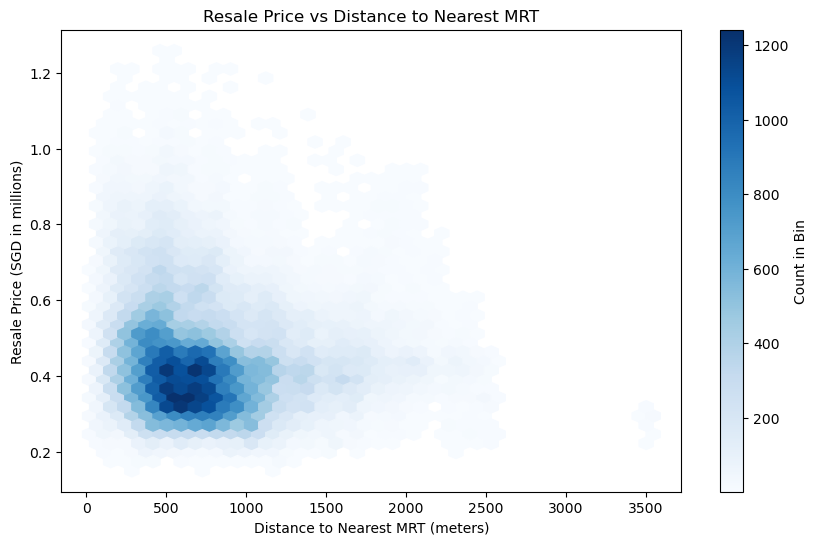

In [147]:
plt.figure(figsize=(10, 6))
plt.hexbin(data['mrt_nearest_distance'], data['resale_price'] / 1e6, gridsize=40, cmap='Blues', mincnt=1)
plt.colorbar(label='Count in Bin')
plt.title('Resale Price vs Distance to Nearest MRT')
plt.xlabel('Distance to Nearest MRT (meters)')
plt.ylabel('Resale Price (SGD in millions)')
plt.show()


### Resale Price vs Distance to Nearest MRT

The hexbin plot illustrates the relationship between resale prices of flats and their proximity to the nearest Mass Rapid Transit (MRT) stations. It is evident that the highest concentration of data points (darker hexbins) is found within shorter distances to MRT stations, indicating a larger volume of transactions for flats closer to transport amenities. Moreover, resale prices tend to be higher for these flats, suggesting that proximity to MRT stations is a valuable attribute in the housing market. This plot underscores the importance of transportation links in urban real estate valuation.


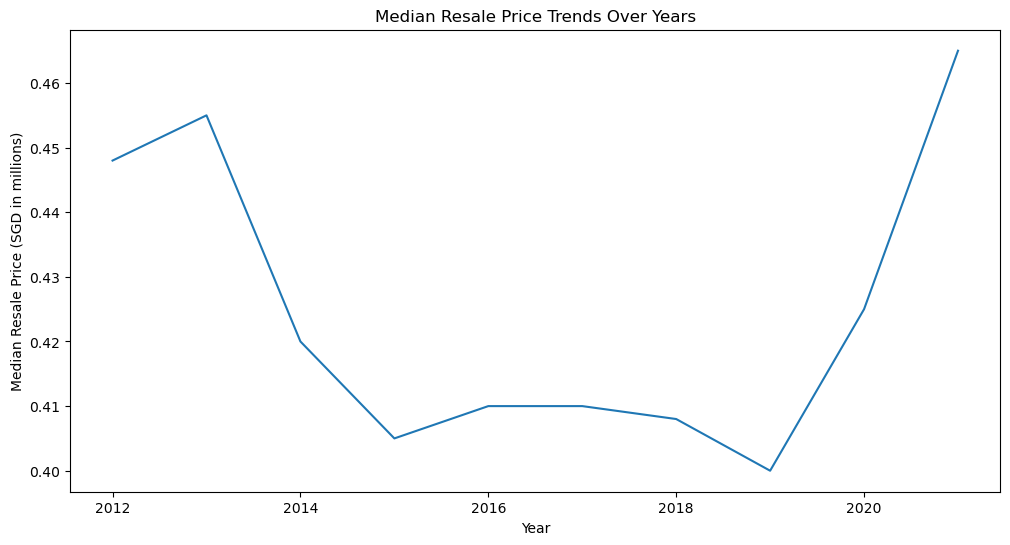

In [155]:
yearly_prices = data.groupby('tranc_year')['resale_price'].median() / 1e6
plt.figure(figsize=(12, 6))
sns.lineplot(data=yearly_prices)
plt.title('Median Resale Price Trends Over Years')
plt.xlabel('Year')
plt.ylabel('Median Resale Price (SGD in millions)')
plt.show()


The line chart displays the median resale price trends of flats over the years. A significant dip is observed around 2016, followed by a period of stability. Post-2018, there is a dramatic increase in median resale price. This trend line helps in understanding the overall market dynamics during the decade.


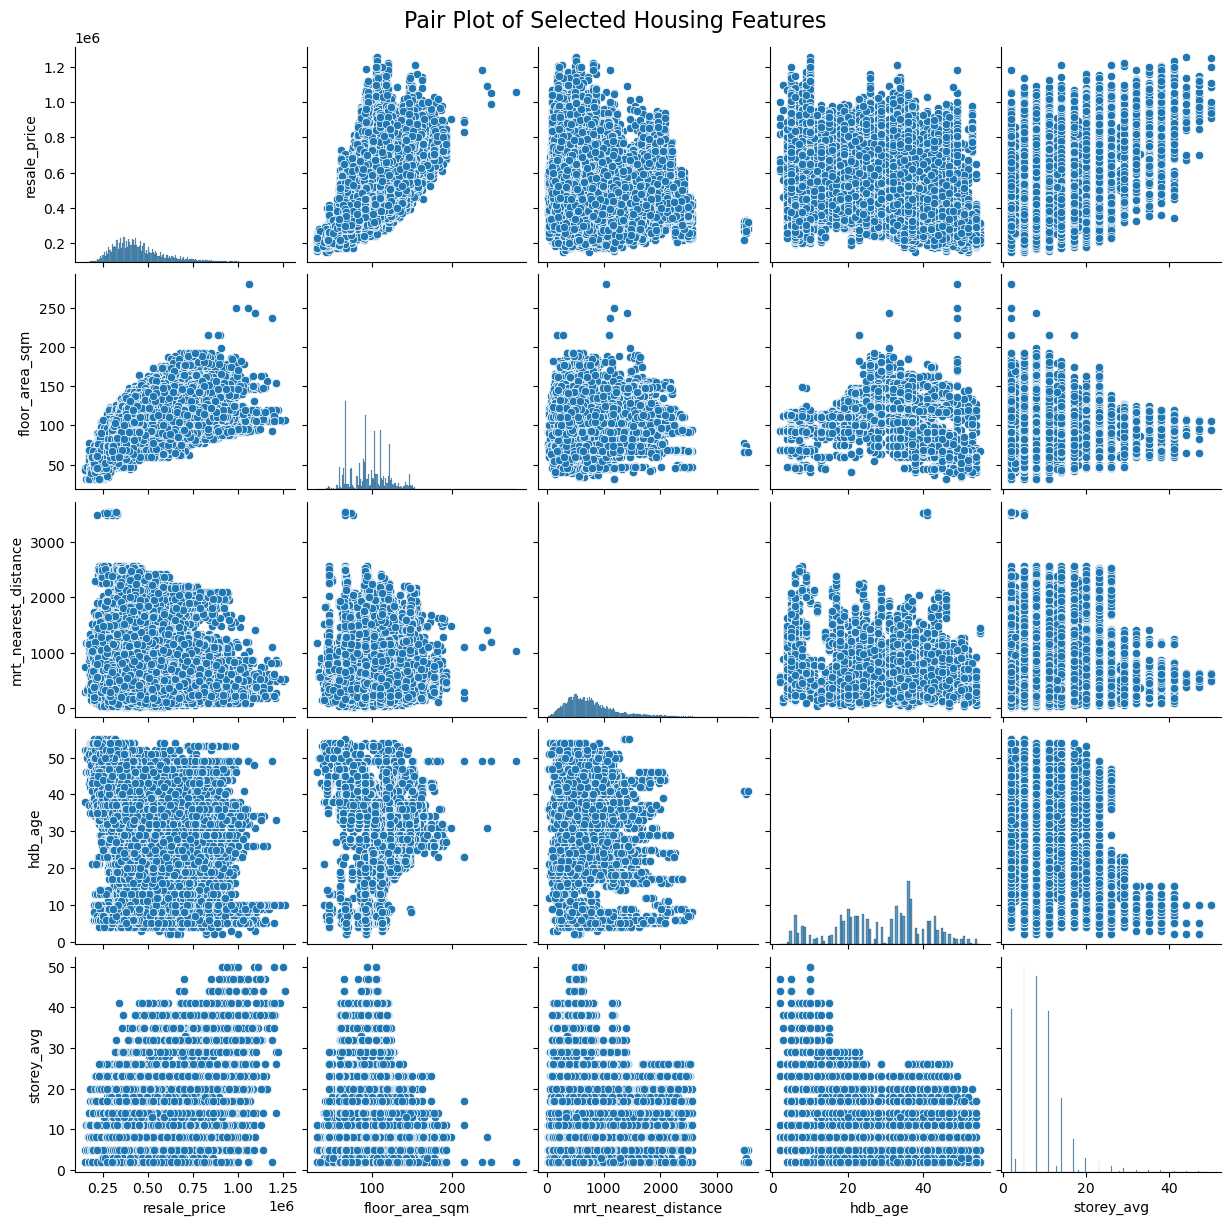

In [159]:
columns_to_plot = ['resale_price', 'floor_area_sqm', 'mrt_nearest_distance', 'hdb_age', 'storey_range']

# Convert storey range to a numerical feature if it's categorical, e.g., '01 TO 03' -> 2 (average storey)
data['storey_avg'] = data['storey_range'].str.extract('(\d+ TO \d+)')[0].apply(
    lambda x: (int(x.split(' TO ')[0]) + int(x.split(' TO ')[1])) / 2 if pd.notnull(x) else None
)

# Update columns_to_plot to use 'storey_avg' instead of 'storey_range'
columns_to_plot[4] = 'storey_avg'

# Use seaborn's pairplot to visualize the relationships between these variables
sns.pairplot(data[columns_to_plot].dropna())
plt.suptitle('Pair Plot of Selected Housing Features', size=16)
plt.subplots_adjust(top=0.95)  # Adjust the title to not overlap with plots
plt.show()

#### Graph Description:

- **Pair Plot Overview**: Each plot in the grid represents a pair-wise relationship between the features listed on the x and y-axes. The diagonal plots provide histograms showing the distribution of individual features.

#### Key Features Analyzed:

1. **Resale Price**: The resale price of flats in SGD.
2. **Floor Area (sqm)**: The total floor area of the flat in square meters, indicating the size of the flat.
3. **MRT Nearest Distance**: The distance in meters to the nearest MRT (Mass Rapid Transit) station, reflecting the flat's accessibility to public transport.
4. **HDB Age**: The age of the HDB (Housing and Development Board) flat, calculated from the current year minus the year of construction completion.
5. **Average Storey**: An engineered feature representing the average storey level of the flat, derived from the 'storey_range' which typically ranges in format like '01 TO 03'.

#### Insights from the Graphs:

- **Price vs. Floor Area**: Generally, larger flats tend to command higher prices. The plot shows a positive correlation between floor area and resale price, which is intuitive as more space often equates to higher value.
- **Price vs. Proximity to MRT**: Closer proximity to MRT stations might indicate higher prices due to better accessibility, a trend to look for in the scatter plot.
- **Price vs. HDB Age**: Older flats might have lower prices due to aging facilities, unless they are in prime locations or have other redeeming features.
- **Distribution and Trends**: Histograms along the diagonal show the distribution of each variable, highlighting commonalities like typical floor area sizes or common storey levels.


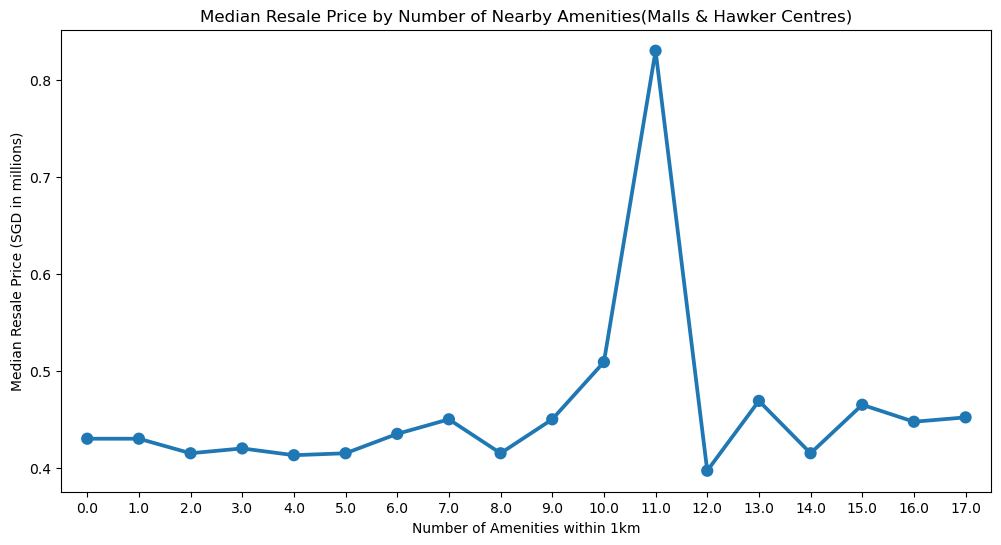

In [156]:
data['amenities_count'] = data['mall_within_1km'] + data['hawker_within_1km']
median_prices_by_amenities = data.groupby('amenities_count')['resale_price'].median() / 1e6

plt.figure(figsize=(12, 6))
sns.pointplot(x=median_prices_by_amenities.index, y=median_prices_by_amenities.values)
plt.title('Median Resale Price by Number of Nearby Amenities(Malls & Hawker Centres)')
plt.xlabel('Number of Amenities within 1km')
plt.ylabel('Median Resale Price (SGD in millions)')
plt.show()


The line chart correlates the median resale prices of flats with the proximity to amenities, revealing a noticeable peak for flats surrounded by approximately 12 amenities within a 1km radius. This peak indicates a potential increase in property values when numerous amenities are accessible. However, this peak could also signify outliers or specific high-value areas, as the median price generally trends steadily without drastic fluctuations for other numbers of amenities.


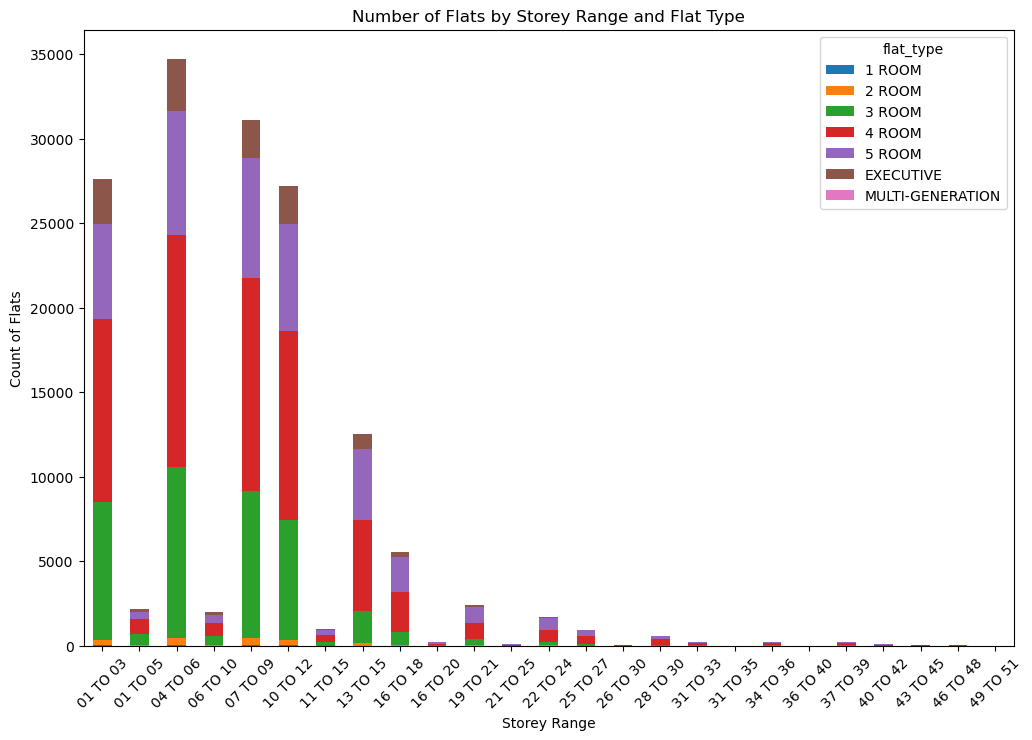

In [157]:
storey_flat_type_counts = data.groupby(['storey_range', 'flat_type']).size().unstack(fill_value=0)
storey_flat_type_counts.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Number of Flats by Storey Range and Flat Type')
plt.xlabel('Storey Range')
plt.ylabel('Count of Flats')
plt.xticks(rotation=45)
plt.show()


The stacked bar chart presents the distribution of flats by storey range and flat type. It highlights that 4-room and 3-room flats are the most prevalent, especially in the lower to mid-storey ranges. The visibility of executive and multi-generation flats is markedly less, suggesting these types are less common or possibly a newer addition to the housing market.


The boxplot displays the distribution of resale prices for flats across various towns. The median prices, spread, and outliers vary significantly between towns, indicating a wide range of housing affordability. Some towns exhibit higher variability in prices, while others maintain a more consistent pricing structure.


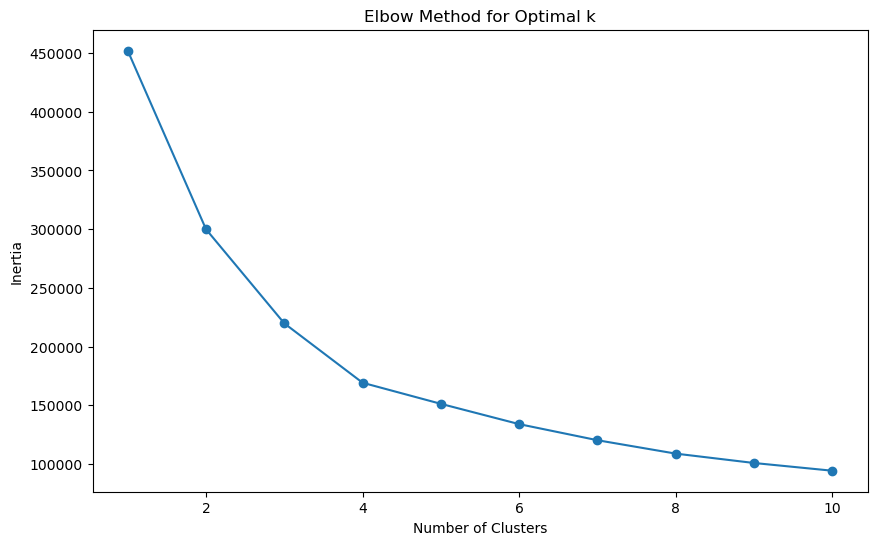

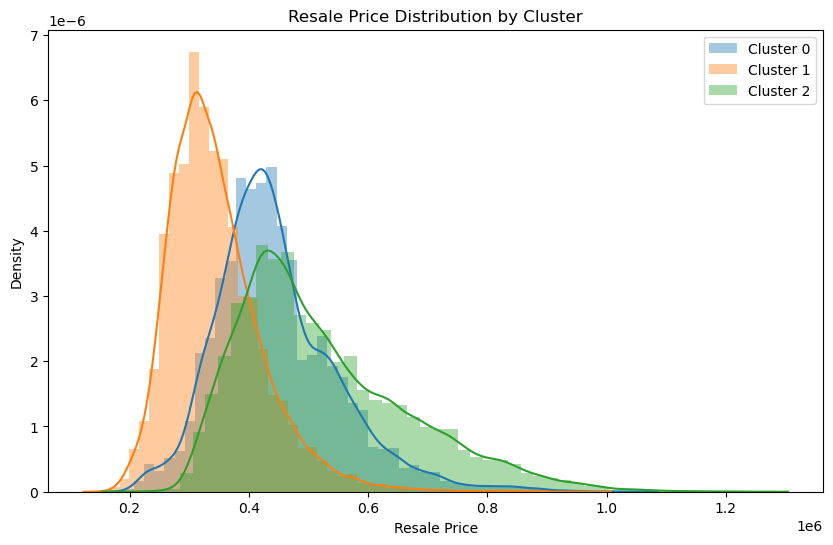

In [160]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Selecting features for clustering
features = data[['floor_area_sqm', 'hdb_age', 'mrt_nearest_distance']]
features = StandardScaler().fit_transform(features)  # Standardizing features

# Determine the optimal number of clusters using the elbow method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

# Assuming the elbow is at k=3, fitting the model
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(features)

# Adding cluster labels to the original data
data['Cluster'] = clusters

# Analyzing clusters
plt.figure(figsize=(10, 6))
for cluster in range(optimal_k):
    cluster_data = data[data['Cluster'] == cluster]
    sns.distplot(cluster_data['resale_price'], label=f'Cluster {cluster}')
plt.title('Resale Price Distribution by Cluster')
plt.xlabel('Resale Price')
plt.ylabel('Density')
plt.legend()
plt.show()


### Cluster Analysis Overview

**Elbow Method Graph:** This graph utilizes the elbow method to determine the optimal number of clusters for analysis. It shows how the sum of squared distances (inertia) decreases with an increase in cluster count. The 'elbow' point suggests the most suitable number of clusters to use, balancing complexity and distinction between the clusters.

**Resale Price Distribution by Cluster Graph:** This graph depicts the distribution of resale prices within each identified cluster. By examining variations across different clusters, we can infer market segmentation based on property attributes such as location, size, and proximity to amenities. This analysis is crucial for identifying price patterns and market trends specific to each cluster.


Text(0.5, 0, 'Counts')

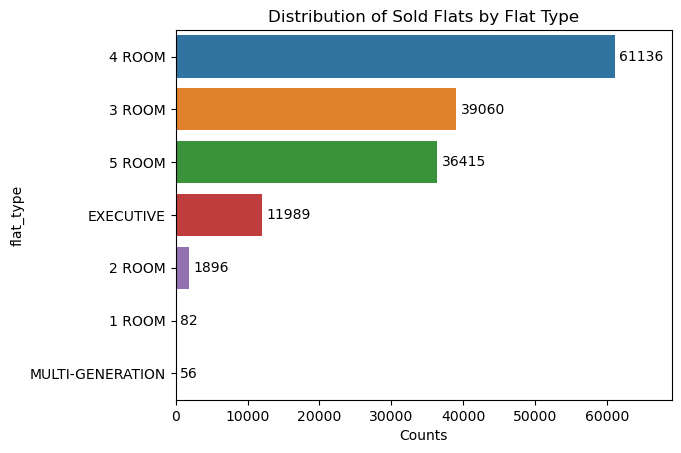

In [163]:
ax = sns.barplot(y=data['flat_type'].value_counts().index, x=data['flat_type'].value_counts().values)
plt.title('Distribution of Sold Flats by Flat Type')
ax.bar_label(ax.containers[0], label_type='edge', padding= 3)
ax.set_xlim(0, 69000)
plt.xlabel('Counts')

The bar chart illustrates the frequency of flats sold by type, showing that 4-room flats are the most common, followed by 3-room and then 5-room flats. Executive and 2-room flats are less common, while 1-room and multi-generational flats are rare in the dataset.

The function `calculate_quantiles` computes the first, second (median), and third quartiles (Q1, Q2, Q3) along with the standard deviation (Std Dev) for resale prices within each town. The data is grouped by 'town', and the calculated quantiles provide insights into the distribution and variability of resale prices in different towns.


In [167]:
def calculate_quantiles(x):
    return pd.Series([x.quantile(0.25), x.quantile(0.5), x.quantile(0.75), np.std(x)], index=['Q1', 'Q2', 'Q3', 'Std Dev'])

In [168]:
data.groupby('town')['resale_price'].apply(calculate_quantiles).unstack()

Q1        Q2        Q3        Std Dev
town                                                        
ANG MO KIO       308000.0  365000.0  473000.0  149769.234387
BEDOK            310000.0  380000.0  490000.0  137701.816379
BISHAN           498000.0  595000.0  738000.0  173598.909610
BUKIT BATOK      300000.0  368880.0  462500.0  122929.812756
BUKIT MERAH      370000.0  568000.0  725000.0  199466.016881
BUKIT PANJANG    354000.0  425000.0  498000.0  104823.940018
BUKIT TIMAH      560058.0  708000.0  875000.0  195530.023246
CENTRAL AREA     417500.0  500000.0  850000.0  244017.696711
CHOA CHU KANG    350000.0  401100.0  463000.0   84204.941905
CLEMENTI         335000.0  408000.0  560000.0  172249.184645
GEYLANG          290000.0  378000.0  555000.0  176244.652449
HOUGANG          350000.0  418000.0  502250.0  127371.298409
JURONG EAST      320000.0  395000.0  510000.0  133980.780731
JURONG WEST      343000.0  410000.0  475888.0   98845.663125
KALLANG/WHAMPOA  331000.0  450000.0  635000.0  188216.037239
MARINE PARADE    398000.0  472000.0  600000.0  174394.067005
PASIR RIS        428000.0  480000.0  558638.0   98256.778306
PUNGGOL          420000.0  460000.0  519000.0   81911.031729
QUEENSTOWN       350000.0  523000.0  740000.0  218199.271932
SEMBAWANG        360000.0  405500.0  460000.0   70836.537398
SENGKANG         400000.0  449000.0  515000.0   81770.224350
SERANGOON        371500.0  463888.0  585000.0  151238.535598
TAMPINES         390000.0  456000.0  538000.0  116305.694662
TOA PAYOH        302000.0  392000.0  641888.0  211853.218621
WOODLANDS        338000.0  390000.0  445000.0   99735.799839
YISHUN           307000.0  357000.0  421000.0   95170.613338

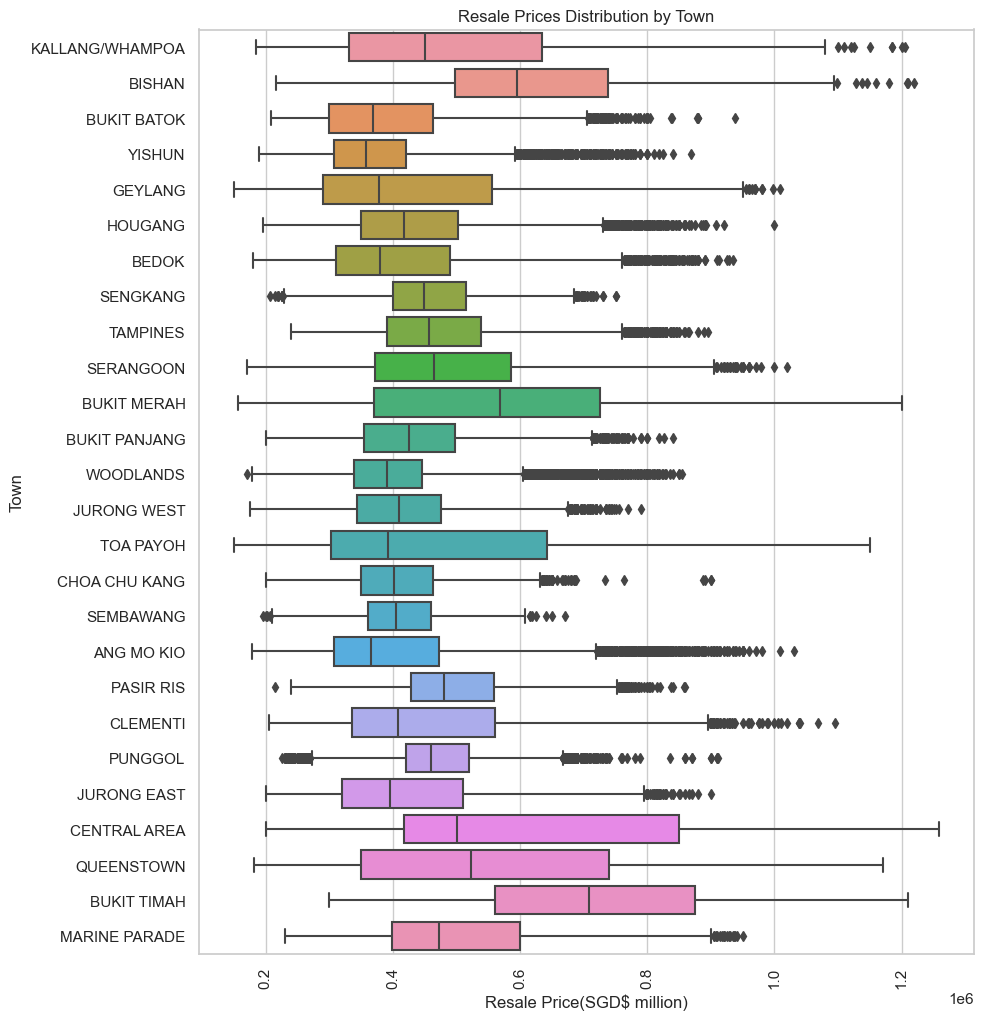

In [173]:
plt.figure(figsize=(10, 12))
sns.boxplot(x='resale_price', y='town', data=data)
plt.xticks(rotation=90)
plt.title('Resale Prices Distribution by Town')
plt.xlabel('Resale Price(SGD$ million)')
plt.ylabel('Town')
plt.show()


### Resale Prices Distribution by Town

The boxplot visualizes the distribution of resale flat prices across different towns. Each box represents the interquartile range (IQR) of prices in a town, with the horizontal line indicating the median price. Outliers are depicted as individual points beyond the whiskers. Notably, towns like 'Marine Parade' and 'Bukit Timah' exhibit higher median prices with wider price ranges, indicating a higher property value in these areas. Conversely, towns like 'Punggol' and 'Sembawang' show more affordable options with a tighter price distribution, suggesting a higher density of lower-priced flats.


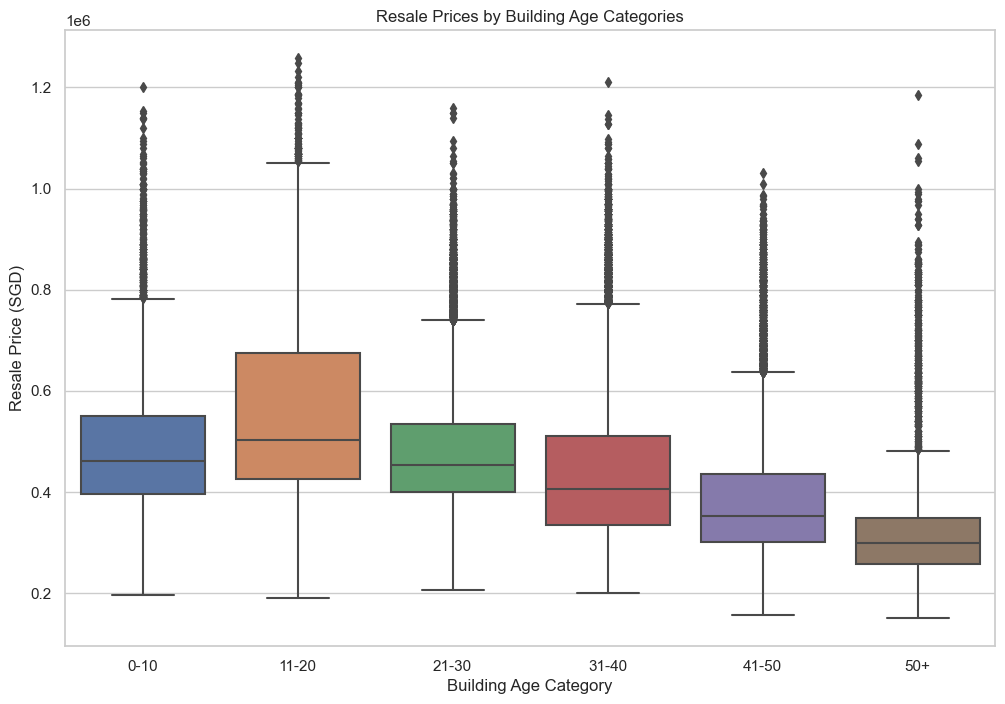

In [219]:
data['building_age'] = 2023 - data['year_completed']  # Update the current year accordingly

# Categorize building age
data['age_category'] = pd.cut(data['building_age'], bins=[0, 10, 20, 30, 40, 50, 100], labels=['0-10', '11-20', '21-30', '31-40', '41-50', '50+'])

# Boxplot to visualize resale prices across different age categories
plt.figure(figsize=(12, 8))
sns.boxplot(x='age_category', y='resale_price', data=data)
plt.title('Resale Prices by Building Age Categories')
plt.xlabel('Building Age Category')
plt.ylabel('Resale Price (SGD$ million)')
plt.show()

The boxplot visualizes the resale prices of flats across different building age categories. The x-axis represents the age categories of the buildings, ranging from new (0-10 years) to old (50+ years), while the y-axis shows the resale price in SGD. The plot indicates that newer buildings (0-10 years) tend to have higher median resale prices compared to older ones, with a noticeable decrease in median price as building age increases. There are also more high-value outliers in newer age categories, while the oldest category (50+ years) shows a lower spread of prices and fewer outliers, indicating less variability in the resale prices of these flats. This suggests that the age of a building is an important factor influencing its resale value.

In [209]:
# Display column data types
print(data.dtypes)

town                           int64
flat_type                      int64
storey_range                   int64
floor_area_sqm               float64
flat_model                     int64
resale_price                 float64
tranc_year                     int64
tranc_month                    int64
lower                          int64
upper                          int64
mid                            int64
price_per_sqft               float64
hdb_age                        int64
max_floor_lvl                  int64
commercial                     int64
market_hawker                  int64
multistorey_carpark            int64
precinct_pavilion              int64
total_dwelling_units           int64
1room_sold                     int64
2room_sold                     int64
3room_sold                     int64
4room_sold                     int64
5room_sold                     int64
exec_sold                      int64
multigen_sold                  int64
studio_apartment_sold          int64
1

#### One-hot encoding
This converts categorical variables into a form that could be provided to ML algorithms to do a better job in prediction.


In [ ]:
# Identify categorical columns (this step depends on your dataset)
categorical_vars = data.select_dtypes(include=['object']).columns
encoded_data = pd.get_dummies(data, columns=categorical_vars, drop_first=True)



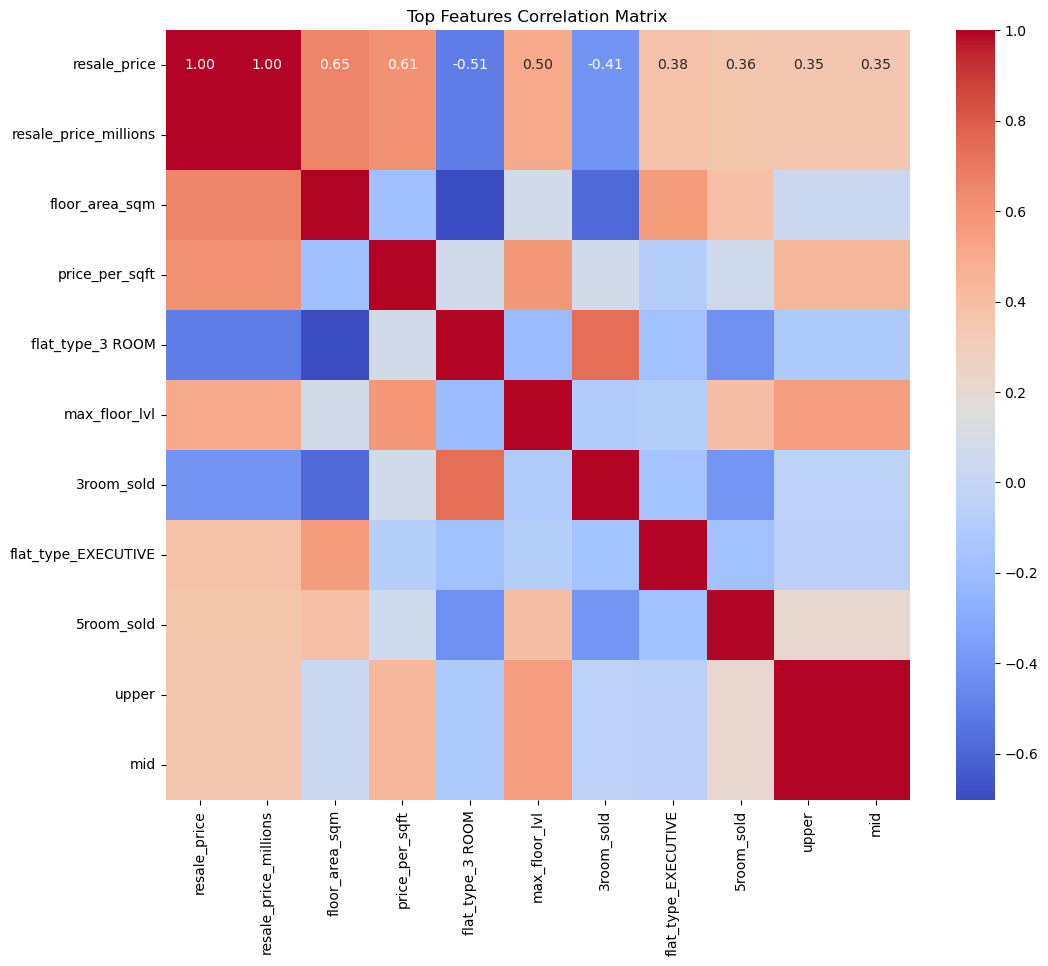

In [164]:
# Calculate the correlation matrix including the newly created dummy variables
corr_matrix = encoded_data.corr()

# Find the features most correlated with 'resale_price'
top_features = corr_matrix['resale_price'].abs().sort_values(ascending=False).head(11).index

# Create a filtered correlation matrix that only includes these top features
filtered_corr_matrix = encoded_data[top_features].corr()

# Visualize the filtered correlation matrix using seaborn's heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(filtered_corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Top Features Correlation Matrix')
plt.show()


### Top Features Correlation Matrix

This heatmap provides a visual summary of the correlation between resale prices and top features in the dataset. A strong positive correlation (red) indicates a direct relationship, while a strong negative correlation (blue) suggests an inverse relationship. For instance, 'floor_area_sqm' shows a strong positive correlation with resale prices, indicating larger flats tend to be more expensive. Conversely, 'max_floor_lvl' has a negative correlation, hinting that flats on higher floors might not necessarily command higher prices.


# Machine Learning

This section involves setting up and training various regression models, such as Linear Regression, Decision Tree, Random Forest and XGBoost.

## Linear Regression Model Analysis

A Linear Regression model has been implemented to predict a continuous target variable based on a single feature. Below is a detailed analysis of the model training, predictions, and performance evaluation:

### Model Training

- **Initialization**: A `LinearRegression` model from scikit-learn is instantiated.
- **Fitting the Model**: The model is trained using a dataset of 100 generated points with a random seed set for reproducibility.


In [186]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Sample data generation
np.random.seed(0)
features = np.random.rand(100, 1)
targets = 2 + 3 * features + np.random.normal(0, 0.1, (100, 1))

# Convert to pandas DataFrame
df = pd.DataFrame(data=np.hstack((features, targets)), columns=['Feature', 'Target'])

# Splitting the data into training and testing sets
features_train, features_test, targets_train, targets_test = train_test_split(df[['Feature']], df['Target'], test_size=0.2, random_state=42)

# Linear Regression Model
model_lr = LinearRegression()
model_lr.fit(features_train, targets_train)

LinearRegression()

### Model Prediction

- **Prediction Generation**: Predictions are made for both training and test datasets.
- **Performance Metrics**:
  - The **R-squared** value, indicating the proportion of variance explained by the model, is calculated for both sets.
  - The **Mean Squared Error (MSE)**, representing the average squared difference between the predicted and actual values, is also computed.


In [ ]:
# Making predictions
predictions_train = model_lr.predict(features_train)
predictions_test = model_lr.predict(features_test)

# Calculate R-squared and MSE
r2_train = r2_score(targets_train, predictions_train)
mse_train = mean_squared_error(targets_train, predictions_train)
r2_test = r2_score(targets_test, predictions_test)
mse_test = mean_squared_error(targets_test, predictions_test)

print(f'R2 score for training set: {r2_train}')
print(f'MSE for training set: {mse_train}')
print(f'R2 score for testing set: {r2_test}')
print(f'MSE for testing set: {mse_test}')

### Model Coefficients

- The model's **intercept** and **coefficient** for the feature are printed out, revealing the slope and the y-intercept of the fitted line.

In [ ]:
print(f'Intercept: {model_lr.intercept_}')
print(f'Coefficient: {model_lr.coef_[0]}')

### Visualization

- **Scatter Plots**: Display the actual versus predicted values for both training and testing sets.
  - Training data points are shown in blue, with the model's predictions in red.
  - Test data points are displayed in green, with corresponding predictions in red.


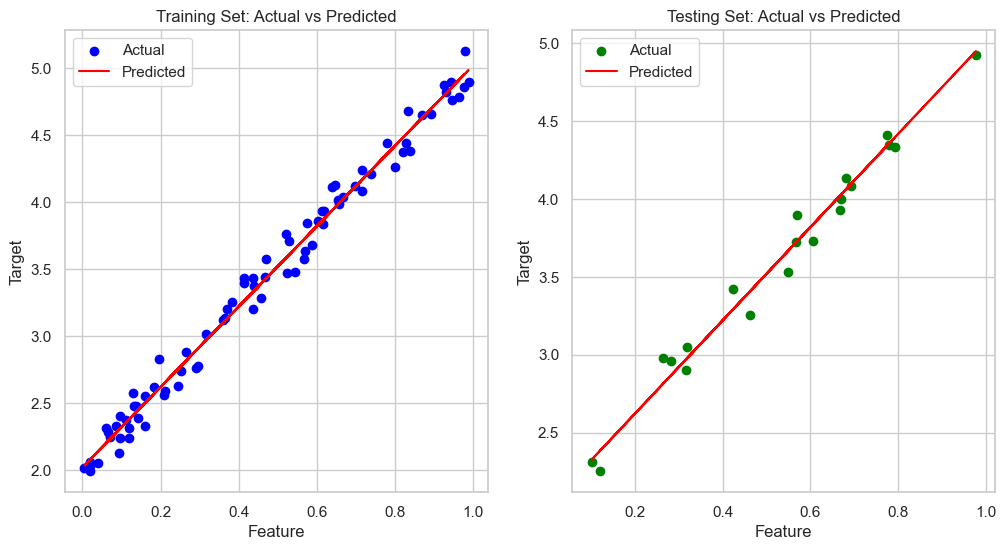

In [184]:
# Plotting actual vs predicted values
plt.figure(figsize=(12, 6))

# Training set graph
plt.subplot(1, 2, 1)
plt.scatter(features_train, targets_train, color='blue', label='Actual')
plt.plot(features_train, predictions_train, color='red', label='Predicted')
plt.title('Training Set: Actual vs Predicted')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.legend()

# Testing set graph
plt.subplot(1, 2, 2)
plt.scatter(features_test, targets_test, color='green', label='Actual')
plt.plot(features_test, predictions_test, color='red', label='Predicted')
plt.title('Testing Set: Actual vs Predicted')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.legend()

### Residual Analysis

- **Residual Plot for Training Data**: A residual plot is created, showcasing the differences between the predicted and actual values (residuals) for the training data.
  - A `lowess` (locally weighted scatterplot smoothing) line is included to help visualize the trend in the residuals.

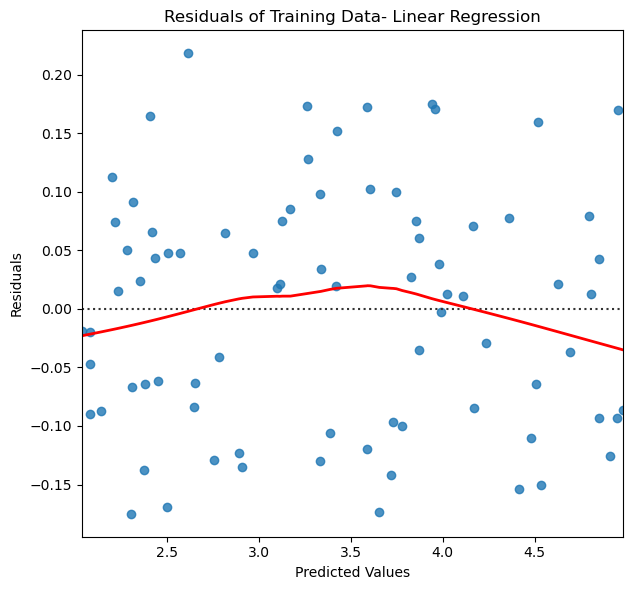

In [122]:
## Residual plot
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
residuals_train = targets_train - predictions_train
sns.residplot(x=predictions_train, y=residuals_train, lowess=True, line_kws={'color': 'red', 'lw': 2})
plt.title('Residuals of Training Data- Linear Regression')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')


plt.tight_layout()
plt.show()


The Linear Regression model provides a straightforward approach to understanding the linear relationship between a single feature and a continuous target variable. The performance metrics and residual plot serve as tools to diagnose the model fit and identify areas where the model may not capture the data's structure effectively.


## Decision Tree Regression Model Analysis

A Decision Tree Regression model is implemented to predict values based on features. This section details the model's training, prediction, evaluation, and visualization aspects:

### Model Training and Prediction

- **Model Initialization**: A `DecisionTreeRegressor` from scikit-learn is used, configured with a maximum depth of 5 and a minimum of 10 samples per leaf.
- **Model Fitting**: The model is trained using the training dataset comprising features and targets derived from a synthetically generated dataset.
- **Prediction Generation**: After training, predictions are made on both the training and testing datasets.

In [187]:
from sklearn.tree import DecisionTreeRegressor

# Initialize the Decision Tree Regressor
dt_regressor = DecisionTreeRegressor(max_depth=5, min_samples_leaf=10, random_state=42)

# Fit the model to the training data
dt_regressor.fit(features_train, targets_train)

# Making predictions
predictions_train_dt = dt_regressor.predict(features_train)
predictions_test_dt = dt_regressor.predict(features_test)

### Model Performance Evaluation

- **Performance Metrics**:
  - **R-squared (R²)**: Measures the proportion of variance in the dependent variable predictable from the independent variables. High R² values indicate a model that closely fits the actual data.
  - **Mean Squared Error (MSE)**: Represents the average of the squares of the errors—that is, the average squared difference between the estimated values and the actual value.
  - **Performance Results**: Both training and testing performance metrics are computed and printed, providing insights into the model's accuracy and generalizability.


In [ ]:
# Evaluate the model
r2_train_dt = r2_score(targets_train, predictions_train_dt)
mse_train_dt = mean_squared_error(targets_train, predictions_train_dt)
r2_test_dt = r2_score(targets_test, predictions_test_dt)
mse_test_dt = mean_squared_error(targets_test, predictions_test_dt)

print("Decision Tree - Training performance:")
print(f"R^2 score for training set: {r2_train_dt}")
print(f"MSE for training set: {mse_train_dt}")

print("Decision Tree - Testing performance:")
print(f"R^2 score for testing set: {r2_test_dt}")
print(f"MSE for testing set: {mse_test_dt}")


### Visualization of Predictions

- **Scatter Plots**: These plots compare the actual vs. predicted values for both training and testing datasets:
  - The plots highlight the predictions with red points and actual values with blue (training) and green (testing) points.
  - A line of perfect predictions (black dashed line) is added for reference, illustrating the ideal scenario where predicted values perfectly match the actual values.


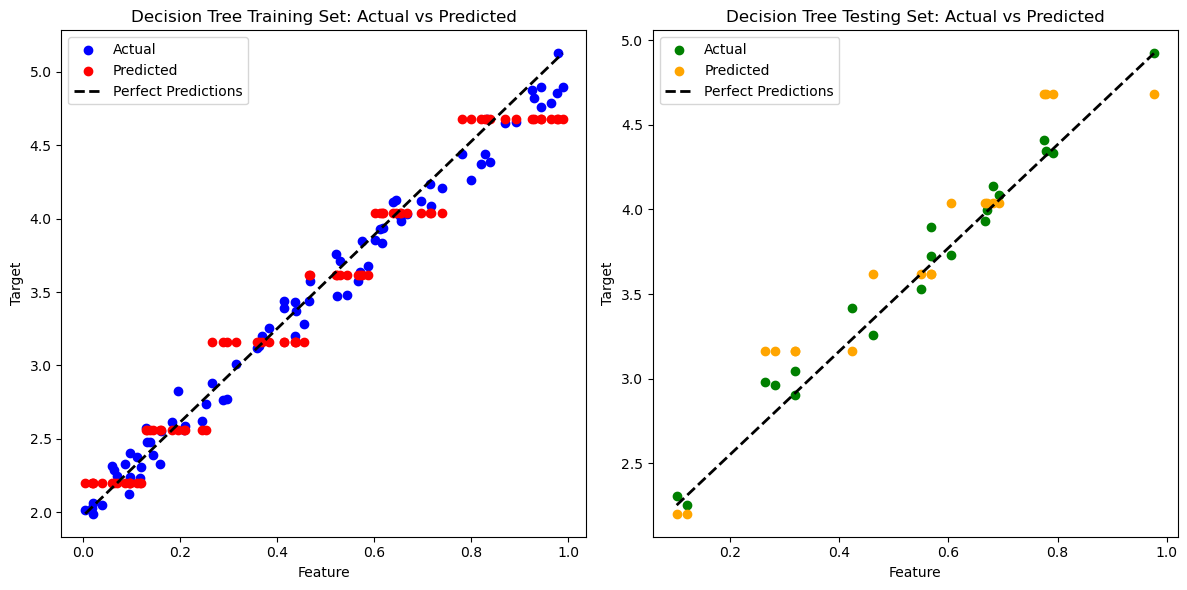

In [96]:
plt.figure(figsize=(12, 6))

# Training set graph
plt.subplot(1, 2, 1)
plt.scatter(features_train, targets_train, color='blue', label='Actual')
plt.scatter(features_train, predictions_train_dt, color='red', label='Predicted')
# Add line of perfect predictions
plt.plot([features_train.min(), features_train.max()], [targets_train.min(), targets_train.max()], 'k--', lw=2, label='Perfect Predictions')
plt.title('Decision Tree Training Set: Actual vs Predicted')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.legend()

# Testing set graph
plt.subplot(1, 2, 2)
plt.scatter(features_test, targets_test, color='green', label='Actual')
plt.scatter(features_test, predictions_test_dt, color='orange', label='Predicted')
# Add line of perfect predictions
plt.plot([features_test.min(), features_test.max()], [targets_test.min(), targets_test.max()], 'k--', lw=2, label='Perfect Predictions')
plt.title('Decision Tree Testing Set: Actual vs Predicted')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.legend()

plt.tight_layout()
plt.show()


### Residual Analysis

- **Residual Plot for Training Data**:
  - This plot is crucial for diagnosing the regression model by displaying the residuals (differences between observed and predicted values).
  - A `lowess` (locally weighted scatterplot smoothing) line is included to help visualize trends or patterns in the residuals, which might suggest issues with model fit or the presence of outliers.


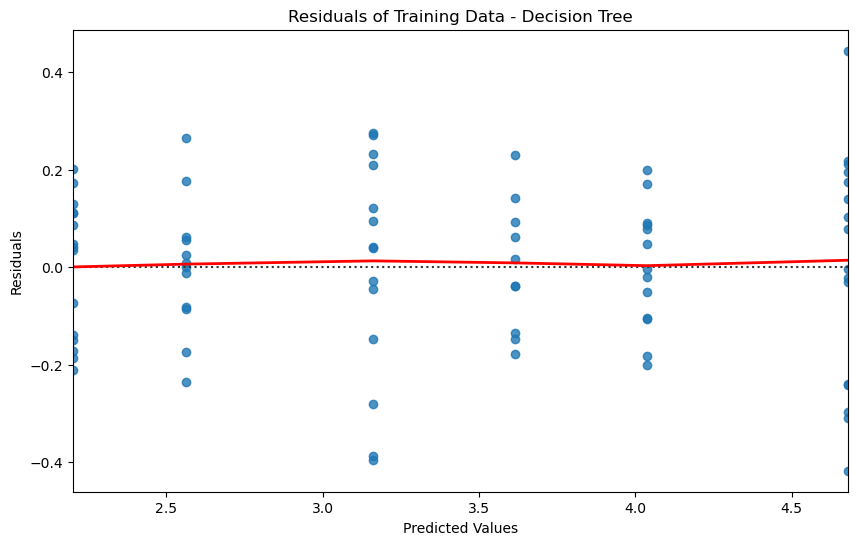

In [97]:
residuals_train_dt = targets_train - predictions_train_dt

plt.figure(figsize=(10, 6))
sns.residplot(x=predictions_train_dt, y=residuals_train_dt, lowess=True, line_kws={'color': 'red', 'lw': 2})
plt.title('Residuals of Training Data - Decision Tree')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()


The Decision Tree model shows how well it can predict data points within the confines of its configuration. The visualization aids in understanding areas where the model performs well and where it may fail, particularly in capturing the underlying pattern for outliers or complex structures in the data. The residual plot further assists in identifying whether there is a systematic bias in how residuals are distributed, which can be critical for further tuning the model.


## Random Forest Regression Model Analysis

The Random Forest Regression model employs multiple decision trees to reduce the risk of overfitting associated with single decision trees. This section outlines the process of training, making predictions, evaluating performance, and visualizing the results of the Random Forest model:

### Model Training and Prediction

- **Model Initialization**: A `RandomForestRegressor` with 100 estimators is utilized, providing a robust approach to regression through ensemble learning.
- **Model Fitting**: The model is trained using the features and target values from the training dataset.
- **Prediction Generation**: Predictions are made for both the training set and testing set, allowing for an evaluation of the model's performance on unseen data.

In [188]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model to the training data
rf.fit(features_train, targets_train)

# Make predictions on the training and testing sets
predictions_train_rf = rf.predict(features_train)
predictions_test_rf = rf.predict(features_test)

### Model Performance Evaluation

- **Performance Metrics**:
  - **R-squared (R²)**: This metric indicates the proportion of variance in the dependent variable that is predictable from the independent variables, with higher values representing a better fit.
  - **Mean Squared Error (MSE)**: This measures the average of the squares of the errors, providing an insight into the average magnitude of the prediction errors.
  - **Results**:
    - The model achieves an R² score and MSE for both the training and testing sets, demonstrating its ability to not only fit the training data but also generalize to new data.

In [189]:
# Evaluate the model's performance
r2_train_rf = r2_score(targets_train, predictions_train_rf)
mse_train_rf = mean_squared_error(targets_train, predictions_train_rf)
r2_test_rf = r2_score(targets_test, predictions_test_rf)
mse_test_rf = mean_squared_error(targets_test, predictions_test_rf)

print(f'R2 score for training set (RF): {r2_train_rf}')
print(f'MSE for training set (RF): {mse_train_rf}')
print(f'R2 score for testing set (RF): {r2_test_rf}')
print(f'MSE for testing set (RF): {mse_test_rf}')

R2 score for training set (RF): 0.9975084799893854
MSE for training set (RF): 0.002027783855888463
R2 score for testing set (RF): 0.9759108334091994
MSE for testing set (RF): 0.011608361704545985


### Visualization of Predictions

- **Scatter Plots**:
  - These plots show the actual versus predicted values for both the training and testing datasets:
    - Blue points represent actual values, and red or orange points represent predictions, allowing for a visual comparison.
    - A best-fit line (black) is added to illustrate the general trend and the ideal prediction line where the predicted values match perfectly with actual values.

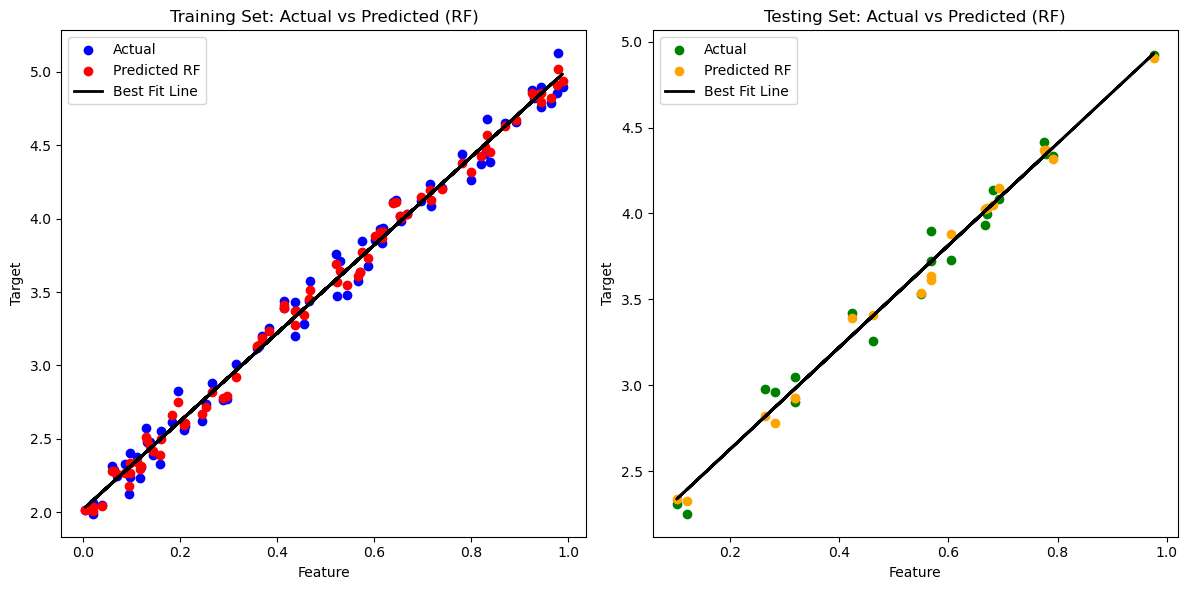

In [99]:
plt.figure(figsize=(12, 6))

# Training set graph for Random Forest
plt.subplot(1, 2, 1)
plt.scatter(features_train, targets_train, color='blue', label='Actual')
plt.scatter(features_train, predictions_train_rf, color='red', label='Predicted RF')
# Convert DataFrame to NumPy array and compute a line of best fit
slope, intercept = np.polyfit(features_train.values.ravel(), targets_train.values.ravel(), 1)
plt.plot(features_train, slope * features_train.values + intercept, color='black', linewidth=2, label='Best Fit Line')
plt.title('Training Set: Actual vs Predicted (RF)')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.legend()

# Testing set graph for Random Forest
plt.subplot(1, 2, 2)
plt.scatter(features_test, targets_test, color='green', label='Actual')
plt.scatter(features_test, predictions_test_rf, color='orange', label='Predicted RF')
# Convert DataFrame to NumPy array and compute a line of best fit
slope_test, intercept_test = np.polyfit(features_test.values.ravel(), targets_test.values.ravel(), 1)
plt.plot(features_test, slope_test * features_test.values + intercept_test, color='black', linewidth=2, label='Best Fit Line')
plt.title('Testing Set: Actual vs Predicted (RF)')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.legend()

plt.tight_layout()
plt.show()

### Residual Analysis

- **Residual Plot for Training Data**:
  - Residuals (the differences between observed and predicted values) are plotted to assess the errors in predictions.
  - A `lowess` line (locally weighted scatterplot smoothing) is included to visualize trends in the residuals, which can help identify patterns of prediction errors and potential bias in the model.

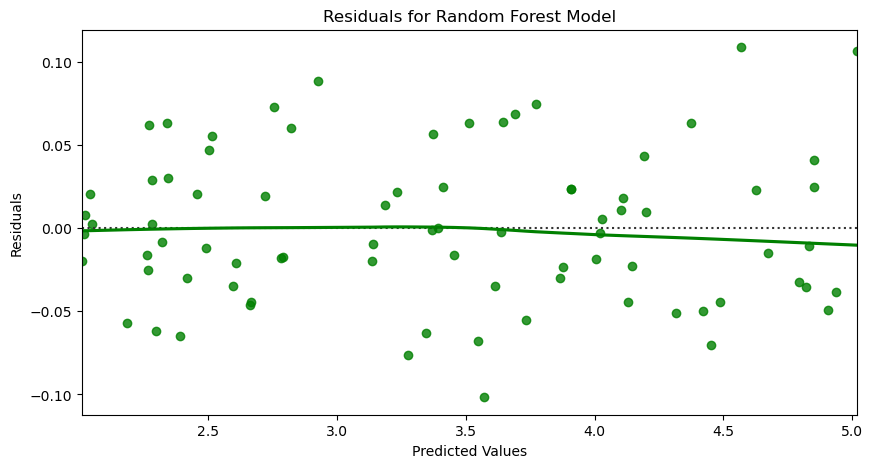

In [100]:
residuals_train_rf = targets_train - predictions_train_rf

plt.figure(figsize=(10, 5))
sns.residplot(x=predictions_train_rf, y=residuals_train_rf, lowess=True, color='green')
plt.title('Residuals for Random Forest Model')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()


The Random Forest model demonstrates strong predictive capabilities with good generalizability to new data, as evidenced by the high R² scores and relatively low MSE. The scatter plots and residual plot provide valuable insights into the accuracy and reliability of the model, highlighting areas where the model performs well and where improvements might be needed. This model proves to be a powerful tool for regression tasks, effectively handling both linear and non-linear relationships in the data.


## XGBoost  Model Implementation

XGBoost is an advanced implementation of gradient boosting that aims to be highly efficient, flexible, and portable. It is particularly well-suited for large datasets and high-dimensional feature space.

### Model Setup and Training

- **Library Installation**: `xgboost` is installed using pip to enable the use of its powerful algorithms.

In [190]:
pip install xgboost


Note: you may need to restart the kernel to use updated packages.


In [191]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb


- **Data Preparation**:
  - **Encoding Categorical Variables**: All categorical variables are encoded using `LabelEncoder` to transform them into numerical values that can be processed by the model.
    - **Data Splitting**: The dataset is split into training and testing sets, with 80% of the data used for training and 20% for testing to evaluate model performance.

In [192]:
# Encode categorical variables using Label Encoding
categorical_vars = data.select_dtypes(include=['object']).columns
for col in categorical_vars:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])

# Split the data into features and target
X = data.drop('resale_price', axis=1)
y = data['resale_price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

- **DMatrix Conversion**: The feature and target sets are converted into `DMatrix`, a data structure optimized for memory efficiency and training speed in XGBoost.

In [193]:
# Convert the dataset into an optimized data structure called Dmatrix
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)


- **Model Parameters**:
  - Configured with parameters like `max_depth`, `min_child_weight`, and learning rate (`eta`) to control the complexity and performance of the model.
- **Model Training**: The model is trained with 100 boosting rounds, allowing for iterative refinement of predictions.


In [200]:
# Assuming data is already preprocessed and split into X_train, X_test, y_train, y_test
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

params = {
    'max_depth': 3,  # Reduced from a higher value to limit tree complexity
    'min_child_weight': 10,  # Increased from a lower value to ensure more samples per leaf
    'eta': 0.1,  # Learning rate
    'subsample': 0.8,  # Subsample ratio of the training instances
    'colsample_bytree': 0.8,  # Subsample ratio of columns when constructing each tree
    'objective': 'reg:squarederror',  # Regression with squared error
    'eval_metric': 'rmse'  # Root mean squared error as evaluation metric
}

# Train the model
num_boost_round = 100
early_stopping_rounds = 10
evals = [(dtrain, 'train'), (dtest, 'test')]
model = xgb.train(params, dtrain, num_boost_round=num_boost_round,
                  early_stopping_rounds=early_stopping_rounds, evals=evals)

# Make predictions
predictions = model.predict(dtest)



[0]	train-rmse:129547.98131	test-rmse:128990.13760
[1]	train-rmse:117041.07960	test-rmse:116587.73743
[2]	train-rmse:105754.53432	test-rmse:105326.67100
[3]	train-rmse:95570.01359	test-rmse:95238.91996
[4]	train-rmse:88553.42945	test-rmse:88297.85725
[5]	train-rmse:80055.97470	test-rmse:79830.96252
[6]	train-rmse:72415.59115	test-rmse:72184.09193
[7]	train-rmse:65497.36252	test-rmse:65304.09274
[8]	train-rmse:61331.40083	test-rmse:61189.85736
[9]	train-rmse:55511.36941	test-rmse:55409.59851
[10]	train-rmse:50271.66015	test-rmse:50217.47157
[11]	train-rmse:45549.54840	test-rmse:45530.99161
[12]	train-rmse:42356.36396	test-rmse:42366.07534
[13]	train-rmse:38428.96797	test-rmse:38447.69032
[14]	train-rmse:34900.34443	test-rmse:34945.62188
[15]	train-rmse:31706.39271	test-rmse:31767.96617
[16]	train-rmse:28842.91911	test-rmse:28912.73565
[17]	train-rmse:26270.00889	test-rmse:26352.70989
[18]	train-rmse:23970.89337	test-rmse:24062.28750
[19]	train-rmse:22481.83665	test-rmse:22585.10237
[20]

### Model Evaluation and Visualization

- **Performance Metrics**:
  - **Mean Squared Error (MSE)** and **R-squared (R²)** metrics are computed to quantify the model's accuracy and predictive power.

In [201]:
# Calculate metrics
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f"MSE: {mse}")
print(f"R2 score: {r2}")


MSE: 19619115.783947933
R2 score: 0.999037834379737


 - **Actual vs. Predicted Values Plot**:
    - This scatter plot visually compares the actual values against the model's predictions, highlighting the accuracy of the model. Points closer to the ideal fit line indicate better predictions.

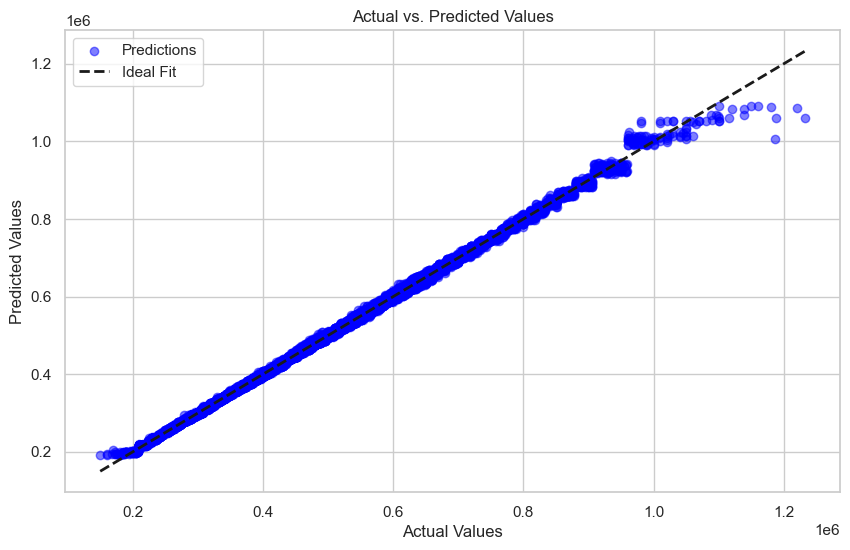

In [199]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions, alpha=0.5, color='blue', label='Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Ideal Fit')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.grid(True)
plt.legend()
plt.show()


- **Residual Analysis**:
  - **Residual Plot**:
    - This plot shows the residuals (differences between observed and predicted values) against the predicted values. Ideally, residuals should be randomly dispersed around the horizontal line (y=0), indicating that the model does not suffer from non-linearities or heteroscedasticity.

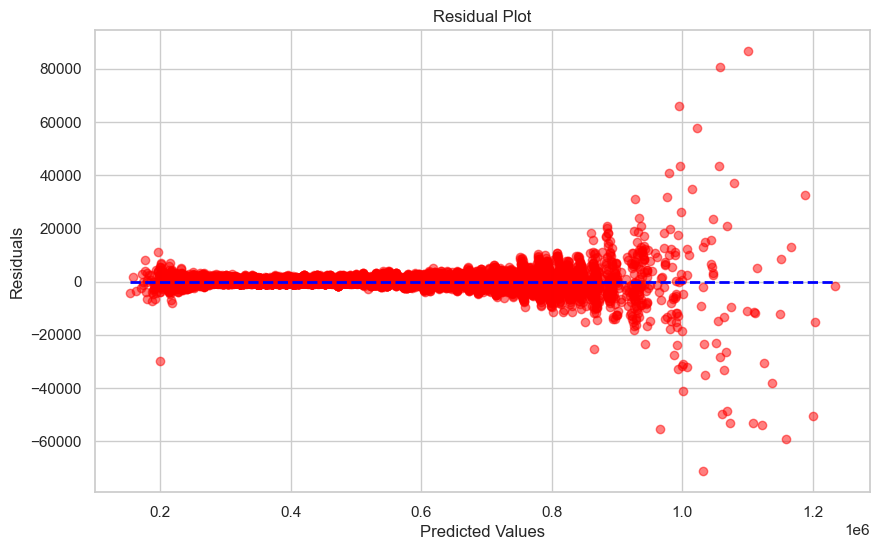

In [180]:
# Calculating residuals
residuals = y_test - predictions

# Plotting residuals
plt.figure(figsize=(10, 6))
plt.scatter(predictions, residuals, alpha=0.5, color='red')
plt.hlines(y=0, xmin=predictions.min(), xmax=predictions.max(), colors='blue', linestyles='--', lw=2)
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()


The XGBoost model demonstrates robust performance with the capability to handle complex nonlinear relationships within the data. The evaluation metrics and visualizations serve as vital tools in confirming the effectiveness of the model and identifying any areas where model performance can be enhanced. This detailed analysis helps in understanding the depth of XGBoost's application to regression tasks and its efficacy in producing reliable predictions.


## Model Comparison

Throughout the analysis, four predictive models were developed and compared:

1. **Linear Regression (LR)**: Served as a baseline for performance comparison, with straightforward interpretation of coefficients.
   
2. **Decision Tree (DT)**: Offered a more nuanced approach, capturing non-linear relationships in the data.
   
3. **Random Forest (RF)**: Built upon Decision Trees, it improved predictive accuracy through an ensemble of decision trees and feature randomness.
   
4. **XGBoost**: Advanced gradient boosting framework known for its efficiency and effectiveness, especially on structured data.

The comparison was based on two key metrics:

- **R-squared (R²)**: Measured the proportion of the variance in the dependent variable that is predictable from the independent variables. A higher R² indicated a better fit of the model to the data.

- **Mean Squared Error (MSE)**: Evaluated the average squared difference between the estimated values and the actual value. A lower MSE pointed to a model with higher precision.

### Key Takeaways:

- **Performance**: Each model's performance varied, with XGBoost generally outperforming others in terms of R² and MSE due to its sophisticated handling of complex patterns in the data.

- **Overfitting**: Care was taken to assess overfitting, particularly with Decision Tree and Random Forest, where the risk is higher due to their complexity.

- **Computation Time**: Although not a primary focus, the computation time was also considered. XGBoost offered a good balance between performance and computational efficiency.

- **Interpretability**: Linear Regression provided the best interpretability, which is crucial for stakeholders who value understanding the model's decision-making process.

### Conclusion:

The comparison showed that while simpler models like Linear Regression provided a good starting point for predictions, ensemble methods like Random Forest and boosting algorithms like XGBoost significantly improved prediction accuracy at the cost of complexity and interpretability. The optimal choice of model ultimately depended on the specific needs of the application, whether it is prediction accuracy, interpretability, or computational efficiency.
